<a href="https://colab.research.google.com/github/Meyssemmedini/PRODIGY_DS_03/blob/main/Classification_problem_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preliminary Steps

##Data mounting

In [ ]:
#data mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##import packages

In [ ]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Import modeling tools
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [ ]:
# set the default output to pandas
from sklearn import set_config
set_config(transform_output='pandas')
# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

##Utility Functions

In [ ]:
#source : https://colab.research.google.com/drive/1JiMT8hU-BrN6yPOflCxD3PbxSjawJtpq?usp=sharing
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = {mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = {med_value:,.2f}");

  axes[0].legend();

  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

In [ ]:
def evaluation_metrics(model_name, y_true_train, y_pred_train, y_true_test, y_pred_test):
    # Calculate metrics for the training set
    train_score = accuracy_score(y_true_train, y_pred_train)
    train_rec = recall_score(y_true_train, y_pred_train,pos_label='drugZ')
    train_prec = precision_score(y_true_train, y_pred_train,pos_label='drugZ')

    # Calculate metrics for the test set
    test_score = accuracy_score(y_true_test, y_pred_test)
    test_rec = recall_score(y_true_test, y_pred_test,pos_label='drugZ')
    test_prec = precision_score(y_true_test, y_pred_test,pos_label='drugZ')

    # Print the model information
    print(f'{model_name} Evaluation Metrics:')

    # Print training set metrics
    print('\nTraining set Evals:')
    print(f'Accuracy: {train_score:.3f}')
    print(f'Recall: {train_rec:.3f}')
    print(f'Precision: {train_prec:.3f}')

    # Print a separator
    print('\n' + '='*30 + '\n')

    # Print test set metrics
    print('Test set Evals:')
    print(f'Accuracy: {test_score:.3f}')
    print(f'Recall: {test_rec:.3f}')
    print(f'Precision: {test_prec:.3f}')

##data loading

In [ ]:
#read data
df = pd.read_csv ("/content/drive/MyDrive/virtual intern/Prodigy Infotech/datasets/drug type_.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          237 non-null    float64
 1   Gender       296 non-null    object 
 2   BP           221 non-null    object 
 3   Cholesterol  296 non-null    object 
 4   Na_to_K      296 non-null    object 
 5   Drug         296 non-null    object 
dtypes: float64(1), object(5)
memory usage: 14.0+ KB


,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ
2,NaN,M,Normal,HIGH,9.084,drugZ
3,62.0,M,Normal,HIGH,16.594,drugZ
4,55.0,F,High,NORMAL,10.977,drugQ


#Prepare the data for exploratory analysis purposes

##Data cleaning

###Duplicates

In [ ]:
#Count the number of duplicate rows in  DataFrame.
df.duplicated().sum()

15

In [ ]:
#drop the duplicates
df.drop_duplicates(inplace = True)
#check again for duplicates
df.duplicated().sum()

0

###Missing values

In [ ]:
#identifiying the missing data
df.isna().sum()

Age            54
Gender          0
BP             75
Cholesterol     0
Na_to_K         0
Drug            0
dtype: int64

In [ ]:
#checking the % of missing val in each feature
(df.isna().sum() / len(df) * 100)[df.isna().sum() > 0]

Age    19.217082
BP     26.690391
dtype: float64

####Imputing missing data

#####1- For Age

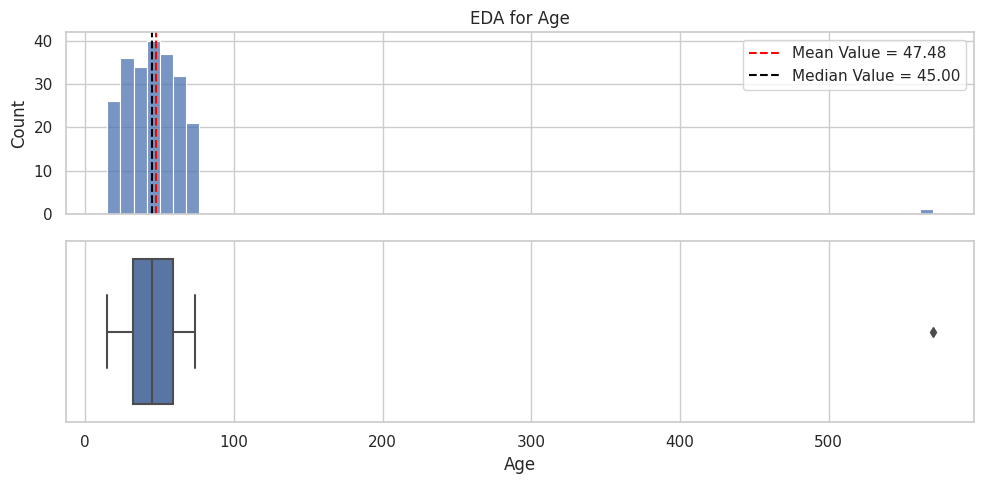

In [ ]:
plot_numeric(df,'Age')


The 'Age' distribution is observed to be normal with an extreme outlier .

**Imputation Method: Median Imputation**
- Justification:

Imputing with the median is a prudent choice as it is less sensitive to extreme values and won't be heavily influenced by the outlier. This helps maintain a more accurate representation of the central tendency in the presence of such extreme values

In [ ]:
#filling nan val with the mean
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age'].isna().sum()

0

#####2- For Blood pressure level

In [ ]:
# Filling missing values in 'BP' with the mode( most frequent value)
df['BP'].fillna(df['BP'].mode()[0], inplace=True)
df['BP'].isna().sum()

0

**Imputation Method: MODE (most frequent) Imputation**
- Justification:

  - Choosing the mode for imputing missing values in the Blood Pressure "BP" column ensures simplicity, aligns with the prevalent distribution, and provides an unbiased representation of existing patterns in this categorical variable.

In [ ]:
## Check for any remaining missing values after imputing
df.isna().sum()

Age            0
Gender         0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

###checking for inconsistencies in data

####1- for Data types

In [ ]:
#checking Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          281 non-null    float64
 1   Gender       281 non-null    object 
 2   BP           281 non-null    object 
 3   Cholesterol  281 non-null    object 
 4   Na_to_K      281 non-null    object 
 5   Drug         281 non-null    object 
dtypes: float64(1), object(5)
memory usage: 15.4+ KB


according to the dictionnary NA_to_K should be a float

In [ ]:
#cheking 'Na_to_K' unique values
df['Na_to_K'].unique()

array(['13.935', '10.103', '9.084', '16.594', '10.977', '25.475', '9.17',
       '13.303', '11.009', '25.917', '18.295', '11.34', '28.632', '9.567',
       '7.49', '17.069', '15.478', '12.894', '8.011', '27.183', '9.281',
       '9.443', '17.225', '24.276', '8.37', '25.893', '9.664', '10.292',
       '19.011', '11.326', '13.967', '11.953', '13.091', '14.239',
       '34.686', '11.227', '18.043', '10.189', '11.198', '11.686',
       '20.489', '18.809', '30.366', '20.942', '11.262', '18.991',
       '15.015', '11.871', '13.769', '12.854', '25.969', '29.271',
       '7.285', '9.514', '9.709', '31.686', '12.856', '13.934', '15.516',
       '19.007', '12.495', '22.818', '16.725', '14.133', '17.211',
       '17.951', '19.128', '30.568', '22.905', '12.307', '28.294',
       '25.974', '38.247', '16.753', '22.456', '27.05', '13.938', '8.75',
       '13.972', '19.675', '32.922', '10.091', '16.275', '8.107',
       '10.443', '11.455', '16.347', '12.006', '6.683', '16.85', '16.31',
       '9.849',

In [ ]:
#adressing the wrong data point in 'Na_to_K' column
df['Na_to_K'] = df['Na_to_K'].replace({'10.403_': 10.403})
# Converting 'Na_to_K' column to float data type
df['Na_to_K'] = df['Na_to_K'].astype(float)
df['Na_to_K'].dtypes

dtype('float64')

####2- for inconsistent values in categorical columns

In [ ]:
# Displaying value counts for each categorical column to check inconsistent values
for column in df.select_dtypes(include='object').columns:
    print(f'Value counts for {column}:')
    print(df[column].value_counts())
    print('\n')

Value counts for Gender:
M         140
F         131
male        4
female      2
Female      1
Male        1
femal       1
Femal       1
Name: Gender, dtype: int64


Value counts for BP:
High      203
Normal     46
Low        32
Name: BP, dtype: int64


Value counts for Cholesterol:
HIGH      145
NORMAL    114
norm        9
high        7
NORM        6
Name: Cholesterol, dtype: int64


Value counts for Drug:
drugZ    147
drugQ    134
Name: Drug, dtype: int64




In [ ]:
#adressing inconsistent values in categorical columns
df['Gender'] = df['Gender'].replace({'male': 'M',
                                     'Male': 'M',
                                     'female':'F',
                                     'Female':'F',
                                     'femal': 'F',
                                     'Femal' :'F'})
df['Cholesterol'] = df['Cholesterol'].replace({'norm': 'Normal',
                                               'NORMAL': 'Normal',
                                               'high':'High',
                                               'HIGH': 'High',
                                               'NORM': 'Normal'})


####3- for impossible data points in numeric columns

In [ ]:
#checking impossible values in numeric columns
df.describe()

,Age,Na_to_K
count,281.000000,281.000000
mean,47.000000,14.862769
std,34.476597,6.474826
min,15.000000,6.269000
25%,36.000000,10.446000
50%,45.000000,12.856000
75%,56.000000,17.206000
max,570.000000,38.247000


- age can't be 570

In [ ]:
# correcting the wrong data point in 'Age' column
df['Age'] = df['Age'].replace({570: 57})
df['Age'].describe()

count    281.000000
mean      45.174377
std       14.448487
min       15.000000
25%       36.000000
50%       45.000000
75%       56.000000
max       74.000000
Name: Age, dtype: float64

# Data visualization & Analysis

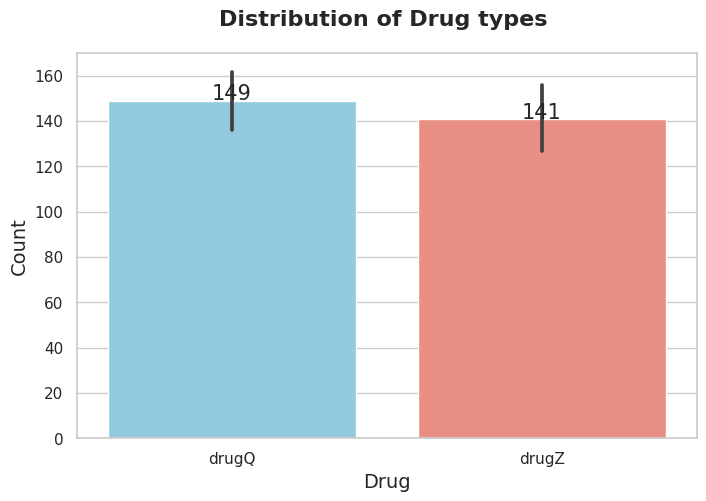

In [ ]:
# Custom color palette
custom_palette = {'drugQ': 'skyblue', 'drugZ': 'salmon'}

# Creating a barplot of the distribution of drug in data
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 5))
plot = sns.barplot(x="Drug", y=df.index, data=df, palette=custom_palette)
# annotation
for bars in plot.patches:

    ax.annotate(format(bars.get_height(), '.0f'),
                (bars.get_x() + bars.get_width() / 2, bars.get_height()),
                ha='center', va='center',
                size=15, xytext=(0, 5),

                textcoords='offset points')

# Set labels and title
plt.title('Distribution of Drug types ', fontsize=16, fontweight='bold', pad = 20)
plt.xlabel('Drug', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

The distribution of drug types in the dataset reveals two categorical classes:
- drugQ
-  drugZ

With a count of 149, 'drugQ' emerges as the more prevalent drug type, followed closely by 'drugZ' with a count of 141.

The relatively comparable counts of these two drug types suggest a balanced distribution among the classes.



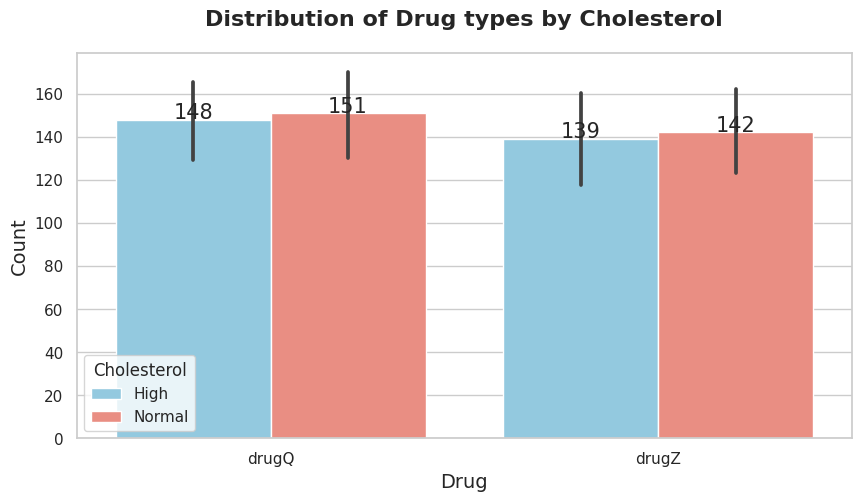

In [ ]:
# Creating a barplot of the distribution of drug by cholesterol level

# Custom color palette
custom_palette = {'High': 'skyblue', 'Normal': 'salmon'}

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))
plot = sns.barplot(x="Drug", y=df.index, hue="Cholesterol", data=df, palette=custom_palette)

# annotation
for bars in plot.patches:

    ax.annotate(format(bars.get_height(), '.0f'),
                (bars.get_x() + bars.get_width() / 2, bars.get_height()),
                ha='center', va='center',
                size=15, xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Drug types by Cholesterol', fontsize=16, fontweight='bold', pad = 20)
plt.xlabel('Drug', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()



The distribution of drugs based on cholesterol levels provides insights into the prescription patterns for 'drugQ' and 'drugZ' concerning different cholesterol categories.
- DrugQ:

   - Commonly prescribed for patients with high and normal cholesterol levels.
   - Shows a balanced distribution between these cholesterol categories.
- DrugZ:

   - Also commonly prescribed with comparable patterns for high and normal cholesterol levels.
   - Demonstrates versatility in usage.

In summary, both 'DrugQ' and 'DrugZ' are commonly prescribed, accommodating to patients across different cholesterol levels.

In [ ]:
#creating a boxplot of the distribution of Na_to_k by drog type
custom_colors = {'drugQ': 'skyblue', 'drugZ': 'salmon'}

fig = px.box(df, x='Drug', y='Na_to_K', color='Drug',
             title='Distribution of Sodium to Potassium ratio in blood by Drug Category',
             labels={'Na_to_K': 'Sodium to Potassium ratio in blood', 'Drug': 'Drug Category'},
             color_discrete_map=custom_colors)

# Customize the layout
fig.update_layout(
    xaxis_title='Drug Category',
    yaxis_title='Sodium to Potassium ratio in blood',
    legend_title='Drug Category'
)

# Show the plot
fig.show()

#source : https://plotly.com/python/box-plots/


- DrugQ:
  - This drug is commonly prescribed for patients with Na_to_K ratios ranging from 6.269 to 14.239.
  - The majority (75%) of these patients exhibit ratios below 12.894, indicating a preference for a more specific range.

- DrugZ:
  - Patients taking DrugZ display a broader spectrum of Na_to_K ratios, spanning from 6.683 to 38.247.
  - Around 75% of these patients have ratios below 22.88325, showcasing a more diverse range in prescriptions.


DrugQ tends to be prescribed within a narrower Na_to_K ratio range, suggesting a specific target or condition.

DrugZ offers a more flexible prescription, catering to a wider patient base with varying Na_to_K levels.

In [ ]:
#creating scatter plot for the relation between age and blood pressur by drug type
custom_colors = {'drugQ': 'skyblue', 'drugZ': 'salmon'}
fig = px.scatter(df, x='Age', y='BP', color='Drug', size='Age',
                 title='Age vs Blood Pressure with Drug Color Mapping',
                 labels={'Age': 'Age', 'BP': ' Blood Pressure'},
                 color_discrete_map=custom_colors)
# Specify the order for 'BP'
category_order = ['Low', 'Normal', 'High']

# Update layout to use the specified order
fig.update_yaxes(categoryorder='array', categoryarray=category_order)
# Show the plot
fig.show()
#source : https://plotly.com/python/line-and-scatter/

The scatter plot describe the relationship between age and blood pressure categorized by drug type.

- Diversity Across Ages:

  - A diverse range of ages is observed across all blood pressure levels.
- Condensed Distribution in High Blood Pressure:

  - The distribution is more condensed for high blood pressure compared to low and normal.
- Drug-Specific Patterns:

  - Low and normal blood pressure is associated with DrugZ, covering a broad age spectrum.
  - In high blood pressure, both DrugZ and DrugQ are present, with DrugQ becoming more prevalent after approximitly the age of 40.
- Prescription Trends:

 - DrugZ is prescribed across a wide age range for low and normal blood pressure.
 - DrugQ becomes more prevalent, particularly in individuals aged 40 and above, in the case of high blood pressure.

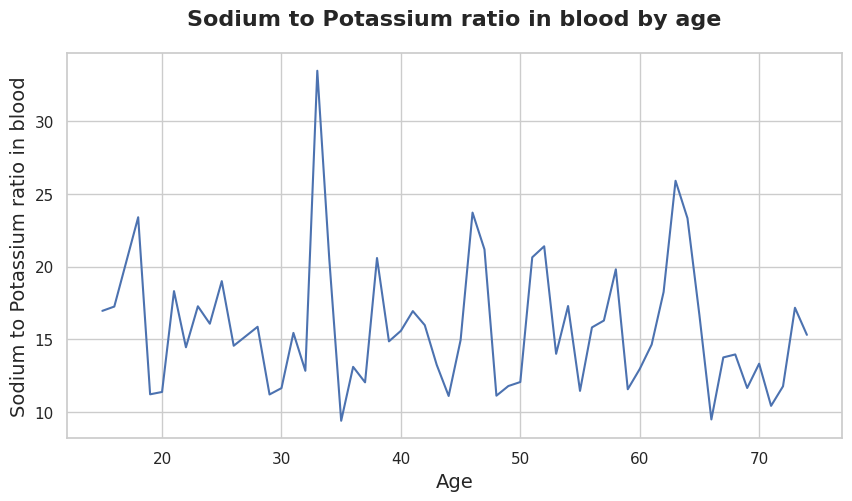

-0.039549580169555454

In [ ]:
#creating a line plot of Sodium to Potassium ratio in blood
fig, ax = plt.subplots(figsize=(10, 5))

plot = sns.lineplot(df,x='Age', y='Na_to_K', errorbar=None);
plt.title('Sodium to Potassium ratio in blood by age', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Sodium to Potassium ratio in blood', fontsize=14)

plt.show()
#calculating the correlation between the two columns
df['Na_to_K'].corr(df['Age'])


- The line chart reveals notable fluctuations in the sodium to potassium ratio across age groups.
- At age 33, a pronounced peak is observed with a ratio of 38.24, while at age 67, there is a trough with a minimal ratio of 6.26.
- The correlation coefficient between the sodium-to-potassium ratio and age is approximately -0.04, suggesting a very weak negative correlation.

This implies that the sodium-to-potassium ratio may not have a direct correlation with age alone, and other factors might be influencing these fluctuations.


In [ ]:
# creating histogram for average age for each gender and drug
fig = px.histogram(df, x='Drug', y='Age', color='Gender',
             title='Average Age by Drug and Gender',
             barmode='group',
             histfunc='avg',
             color_discrete_map=custom_colors)
# Show the plot
fig.show()
#source: https://plotly.com/python/bar-charts/

This bar chart displays the average age distribution categorized by drug type and gender.

The observed differences in average ages between genders for both DrugQ and DrugZ suggest a potential correlation between the type of drug prescribed and age, with additional nuances related to gender.

For DrugQ, the substantial age gap between males and females could imply that this drug is more commonly prescribed to older males.

Conversely, for DrugZ, the age difference is less pronounced, indicating a more uniform distribution across genders.

# Prepare the data appropriately for modeling

##Data Cleaning and Preprocessing

In [ ]:
#read data
df = pd.read_csv ("/content/drive/MyDrive/coding dojo/data sets/Belt2_A_drugtype_v2_final.csv")
#drop the duplicates
df.drop_duplicates(inplace = True)
#adressing the wrong data point in 'Na_to_K' column
df['Na_to_K'] = df['Na_to_K'].replace({'10.403_': 10.403})
# Converting 'Na_to_K' column to float data type
df['Na_to_K'] = df['Na_to_K'].astype(float)
#adressing inconsistent values in categorical columns
df['Gender'] = df['Gender'].replace({'male': 'M',
                                     'Male': 'M',
                                     'female':'F',
                                     'Female':'F',
                                     'femal': 'F',
                                     'Femal' :'F'})
df['Cholesterol'] = df['Cholesterol'].replace({'norm': 'Normal',
                                               'NORMAL': 'Normal',
                                               'high':'High',
                                               'HIGH': 'High',
                                               'NORM': 'Normal'})
# correcting the wrong data point in 'Age' column
df['Age'] = df['Age'].replace({570: 57})
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          227 non-null    float64
 1   Gender       281 non-null    object 
 2   BP           206 non-null    object 
 3   Cholesterol  281 non-null    object 
 4   Na_to_K      281 non-null    float64
 5   Drug         281 non-null    object 
dtypes: float64(2), object(4)
memory usage: 15.4+ KB


,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,High,13.935,drugQ
1,40.0,F,Normal,High,10.103,drugZ
2,NaN,M,Normal,High,9.084,drugZ
3,62.0,M,Normal,High,16.594,drugZ
4,55.0,F,High,Normal,10.977,drugQ


In [ ]:
#Check class balance
df['Drug'].value_counts(normalize = True)

drugZ    0.523132
drugQ    0.476868
Name: Drug, dtype: float64

the classes are parctically balanced

### splitting the data into train and test


In [ ]:
# Define target and features
y = df['Drug']
X = df.drop(columns = 'Drug')
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y )

###Feature Preparation: Transforming columns

The choice between ordinal and one-hot encoding depends on the variable's nature:

- Ordinal Encoding:

   - Ordinal encoding is suitable when the variable has a clear and meaningful order, as is the case with "BP" (Blood Pressure) and "Cholesterol."
   - The levels of these variables have a logical progression, and ordinal encoding preserves this inherent order.
- One-Hot Encoding:

  - One-hot encoding is appropriate for categorical variables like "Gender" where there is no intrinsic order between categories.
  - Each category is represented by a binary column, preserving the independence of each category.

In [ ]:
#Create list of column names
num_cols = X_train.select_dtypes("number").columns
cat_cols = ['Gender']
ord_cols = ['BP','Cholesterol']
#make the order of ordinal columns
qual_cond_order_BP = ['Low','Normal', 'High' ]
qual_cond_order_Cholesterol = ['Normal','High', ]
ordinal_category_orders = [qual_cond_order_BP, qual_cond_order_Cholesterol]
# instantiate preprocessors
scaler = StandardScaler()
cat_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making pipeline with imputation
num_pipe = make_pipeline(SimpleImputer(strategy='mean'), scaler) #we used the mean because we corrected the extreme value so now we have a normal distribution with no extreme outlier
cat_pipe = make_pipeline(cat_encoder,scaler)
ord_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), ord_encoder, scaler)
# Making tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
cat_tuple = ('categoricalFeature', cat_pipe, cat_cols)
ord_tuple = ('ordinalFeature', ord_pipe, ord_cols)

In [ ]:
#Instantiate the ColumnTransformer
col_transformer = ColumnTransformer([num_tuple,cat_tuple, ord_tuple],remainder='passthrough',verbose_feature_names_out=False)
#Fit the Transformer on Training Data
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Age', 'Na_to_K'], dtype='object')),
                                ('categoricalFeature',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Gender']),
                                ('ordinalFeature',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Normal',
                                                                              'High'],
                                                                             ['Normal',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['BP', 'Cholesterol'])],
                  verbose_feature_names_out=False)

In [ ]:
# Transform the training data
X_train_transformed = col_transformer.transform(X_train)
# Transform the testing data
X_test_transformed = col_transformer.transform(X_test)

In [ ]:
#Confirm that all columns are numeric dtypes.
X_train_transformed.dtypes

Age            float64
Na_to_K        float64
Gender_F       float64
Gender_M       float64
BP             float64
Cholesterol    float64
dtype: object

In [ ]:
#Confirm that the original numeric features have been scaled.
X_train_transformed.describe().round(2)

,Age,Na_to_K,Gender_F,Gender_M,BP,Cholesterol
count,210.00,210.00,210.00,210.00,210.00,210.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.05,-1.31,-0.94,-1.07,-2.53,-1.09
25%,-0.68,-0.65,-0.94,-1.07,-0.99,-1.09
50%,0.00,-0.32,-0.94,0.94,0.55,0.92
75%,0.76,0.43,1.07,0.94,0.55,0.92
max,1.93,3.50,1.07,0.94,0.55,0.92


In [ ]:
#Confirm that missing values are imputed
X_train_transformed.isna().sum()

Age            0
Na_to_K        0
Gender_F       0
Gender_M       0
BP             0
Cholesterol    0
dtype: int64

#Building & Optimizing Models to predict Drug Type

##Decision Tree Classifier

In [ ]:
# Instantiate a default decision tree
dec_tree = DecisionTreeClassifier(random_state = 42 )
# Create a pipeline with preprocessing and the model
dec_tree_pipe = make_pipeline( col_transformer, dec_tree)
# Fit on the training data
dec_tree_pipe.fit(X_train, y_train)
# Obtain predictions
dt_train_preds = dec_tree_pipe.predict(X_train)
dt_test_preds = dec_tree_pipe.predict(X_test)
dec_tree_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Na_to_K'], dtype='object')),
                                                 ('categoricalFeature',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('...
                                                  ['Gender']),
                                                 ('ordinalFeature',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Normal',
                                                                                               'High'],
                                                                                              ['Normal',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BP', 'Cholesterol'])],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [ ]:
#evaluation metrics
evaluation_metrics('Decision Tree', y_train, dt_train_preds, y_test, dt_test_preds)

Decision Tree Evaluation Metrics:

Training set Evals:
Accuracy: 1.000
Recall: 1.000
Precision: 1.000


Test set Evals:
Accuracy: 0.930
Recall: 0.946
Precision: 0.921


              precision    recall  f1-score   support

       drugQ       0.94      0.91      0.93        34
       drugZ       0.92      0.95      0.93        37

    accuracy                           0.93        71
   macro avg       0.93      0.93      0.93        71
weighted avg       0.93      0.93      0.93        71



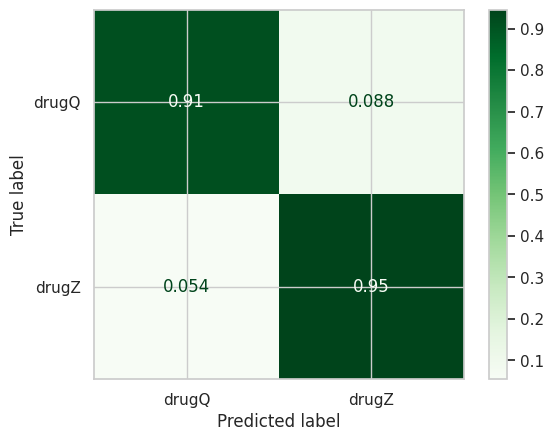

In [ ]:
print(classification_report(y_test, dt_test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, dt_test_preds, normalize='true', cmap='Greens');

### Decision Tree model Tuning

In [ ]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
# Define the parameter grid for GridSearchCV
dec_tree_pipe_param_grid = {
    'decisiontreeclassifier__class_weight': [None, 'balanced'],
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [None, 5, 10, 15, 20],
    'decisiontreeclassifier__min_samples_split': [1,2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
    'decisiontreeclassifier__max_features': [None, 'sqrt', 'log2', 0.5, 0.7],

}

# Use GridSearchCV for hyperparameter tuning
dec_tree_pipe_grid = GridSearchCV(dec_tree_pipe, dec_tree_pipe_param_grid, cv=5)
dec_tree_pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Na_to_K'], dtype='object')),
                                                                        ('categoricalFeature',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='igno...
             param_grid={'decisiontreeclassifier__class_weight': [None,
                                                                  'balanced'],
                         'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [None, 5, 10, 15,
                                                               20],
                         'decisiontreeclassifier__max_features': [None, 'sqrt',
                                                                  'log2', 0.5,
                                                                  0.7],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
                         'decisiontreeclassifier__min_samples_split': [1, 2, 5,
                                                                       10]})

In [ ]:
dec_tree_pipe_grid.best_params_

{'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__max_features': 0.5,
 'decisiontreeclassifier__min_samples_leaf': 2,
 'decisiontreeclassifier__min_samples_split': 10}

In [ ]:
#retrieve the best version of the model
dec_tree_best_model = dec_tree_pipe_grid.best_estimator_

#refit the model on the whole training set
dec_tree_best_model.fit(X_train, y_train)
# prediction
dec_tree_best_model_train_pred = dec_tree_best_model.predict(X_train)
dec_tree_best_model_test_pred = dec_tree_best_model.predict(X_test)

#score the model on the test set
dec_tree_best_model.score(X_test, y_test)

0.9577464788732394

In [ ]:
#evaluation metrics
evaluation_metrics('Tuned Decision Tree', y_train, dec_tree_best_model_train_pred, y_test, dec_tree_best_model_test_pred)

Tuned Decision Tree Evaluation Metrics:

Training set Evals:
Accuracy: 0.952
Recall: 0.909
Precision: 1.000


Test set Evals:
Accuracy: 0.958
Recall: 0.919
Precision: 1.000


              precision    recall  f1-score   support

       drugQ       0.92      1.00      0.96        34
       drugZ       1.00      0.92      0.96        37

    accuracy                           0.96        71
   macro avg       0.96      0.96      0.96        71
weighted avg       0.96      0.96      0.96        71



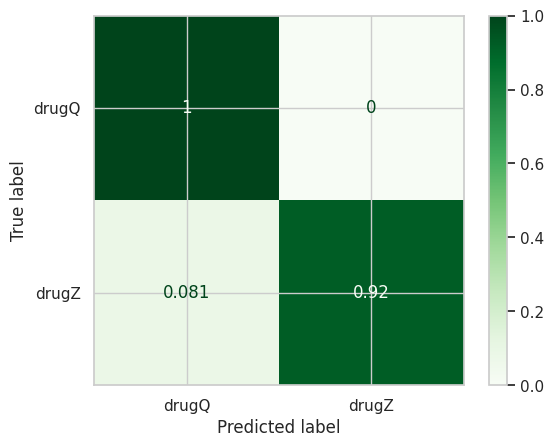

In [ ]:
print(classification_report(y_test, dec_tree_best_model_test_pred))
ConfusionMatrixDisplay.from_predictions(y_test, dec_tree_best_model_test_pred, normalize='true', cmap='Greens');

##Logistic Regression Model

In [ ]:
# Instantiate the model
log_reg = LogisticRegression()
# Create a pipeline with preprocessing and the model
logreg_pipe = make_pipeline( col_transformer, log_reg)

# Fit the model
logreg_pipe.fit(X_train, y_train)

# Predictions
logregp_train_preds = logreg_pipe.predict(X_train)
logregp_test_preds = logreg_pipe.predict(X_test)
logreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Na_to_K'], dtype='object')),
                                                 ('categoricalFeature',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('...
                                                                   StandardScaler())]),
                                                  ['Gender']),
                                                 ('ordinalFeature',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Normal',
                                                                                               'High'],
                                                                                              ['Normal',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BP', 'Cholesterol'])],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression())])

In [ ]:
#evaluation of training and testing sets
evaluation_metrics('Logistic Regression', y_train, logregp_train_preds, y_test, logregp_test_preds)

Logistic Regression Evaluation Metrics:

Training set Evals:
Accuracy: 0.924
Recall: 0.855
Precision: 1.000


Test set Evals:
Accuracy: 0.944
Recall: 0.892
Precision: 1.000


              precision    recall  f1-score   support

       drugQ       0.89      1.00      0.94        34
       drugZ       1.00      0.89      0.94        37

    accuracy                           0.94        71
   macro avg       0.95      0.95      0.94        71
weighted avg       0.95      0.94      0.94        71



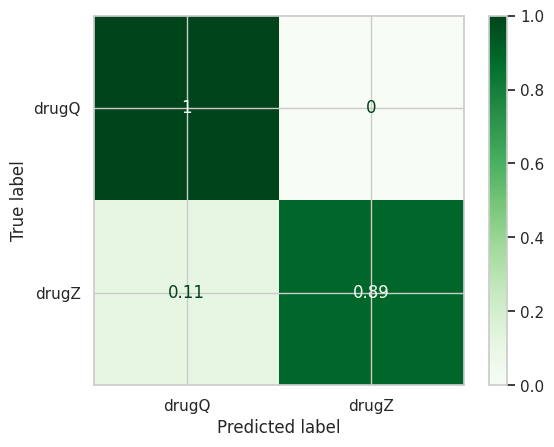

In [ ]:
print(classification_report(y_test, logregp_test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, logregp_test_preds, normalize='true', cmap='Greens');

###Logistic Regression Model Tuning

In [ ]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Define the parameter grid for GridSearchCV
logreg_pipe_param_grid = {
    'logisticregression__class_weight': [None, 'balanced'],
    'logisticregression__max_iter':[100, 200, 300],
    'logisticregression__n_jobs':[1, -1],
    'logisticregression__C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['lbfgs', 'liblinear'],

}

# Use GridSearchCV for hyperparameter tuning
logreg_pipe_grid = GridSearchCV(logreg_pipe, logreg_pipe_param_grid, cv=5)
logreg_pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Na_to_K'], dtype='object')),
                                                                        ('categoricalFeature',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='igno...
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10, 100],
                         'logisticregression__class_weight': [None, 'balanced'],
                         'logisticregression__max_iter': [100, 200, 300],
                         'logisticregression__n_jobs': [1, -1],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['lbfgs', 'liblinear']})

In [ ]:
logreg_pipe_grid.best_params_

{'logisticregression__C': 10,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__max_iter': 100,
 'logisticregression__n_jobs': 1,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'liblinear'}

In [ ]:
#retrieve the best version of the model
logreg_best_model = logreg_pipe_grid.best_estimator_

#refit the model on the whole training set
logreg_best_model.fit(X_train, y_train)
# prediction
logreg_best_model_train_pred = logreg_best_model.predict(X_train)
logreg_best_model_test_pred = logreg_best_model.predict(X_test)

#score the model on the test set
logreg_best_model.score(X_test, y_test)

0.9436619718309859

In [ ]:
#evaluation metrics
evaluation_metrics('Logistic Regression Tuned', y_train, logreg_best_model_train_pred, y_test, logreg_best_model_test_pred)

Logistic Regression Tuned Evaluation Metrics:

Training set Evals:
Accuracy: 0.933
Recall: 0.873
Precision: 1.000


Test set Evals:
Accuracy: 0.944
Recall: 0.892
Precision: 1.000


              precision    recall  f1-score   support

       drugQ       0.89      1.00      0.94        34
       drugZ       1.00      0.89      0.94        37

    accuracy                           0.94        71
   macro avg       0.95      0.95      0.94        71
weighted avg       0.95      0.94      0.94        71



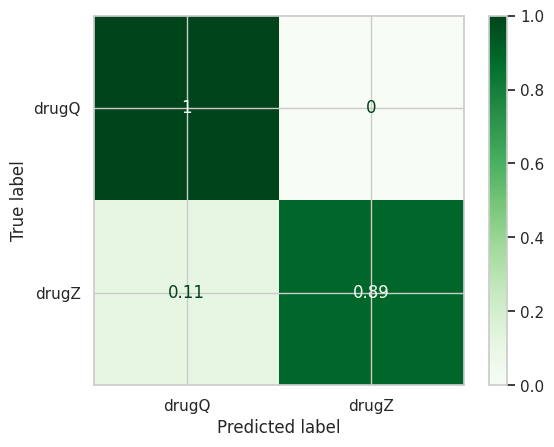

In [ ]:
print(classification_report(y_test, logreg_best_model_test_pred))
ConfusionMatrixDisplay.from_predictions(y_test, logreg_best_model_test_pred, normalize='true', cmap='Greens');

## kneighborsclassifier Model

In [ ]:
# Instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)
# Create a pipeline with preprocessing and the model
knn_pipe = make_pipeline( col_transformer, knn)

# Fit the model
knn_pipe.fit(X_train, y_train)

# Predictions
knn_train_preds = knn_pipe.predict(X_train)
knn_test_preds = knn_pipe.predict(X_test)
knn_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Na_to_K'], dtype='object')),
                                                 ('categoricalFeature',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('...
                                                  ['Gender']),
                                                 ('ordinalFeature',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Normal',
                                                                                               'High'],
                                                                                              ['Normal',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BP', 'Cholesterol'])],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
#evaluation metrics
evaluation_metrics('KNN', y_train, knn_train_preds, y_test, knn_test_preds)

KNN Evaluation Metrics:

Training set Evals:
Accuracy: 1.000
Recall: 1.000
Precision: 1.000


Test set Evals:
Accuracy: 0.930
Recall: 0.919
Precision: 0.944


              precision    recall  f1-score   support

       drugQ       0.91      0.94      0.93        34
       drugZ       0.94      0.92      0.93        37

    accuracy                           0.93        71
   macro avg       0.93      0.93      0.93        71
weighted avg       0.93      0.93      0.93        71



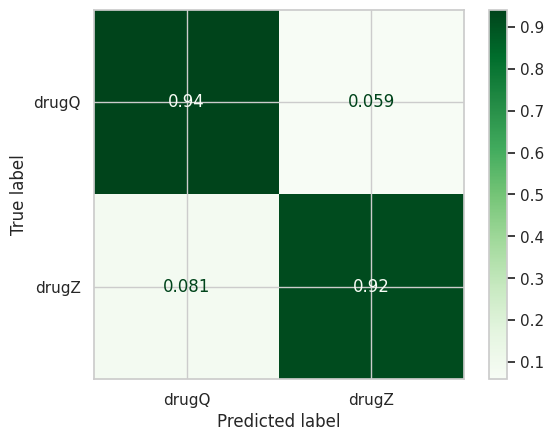

In [ ]:
print(classification_report(y_test, knn_test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds, normalize='true', cmap='Greens');

### kneighborsclassifier Model Tuning

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# Define the parameter grid for GridSearchCV
knn_pipe_param_grid = {
    'kneighborsclassifier__n_neighbors': [1,2,3, 5, 6, 7, 8, 10],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__leaf_size': [2,3,4,5,10] }

# Use GridSearchCV for hyperparameter tuning
knn_pipe_grid = GridSearchCV(knn_pipe, knn_pipe_param_grid, cv=5)
knn_pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Na_to_K'], dtype='object')),
                                                                        ('categoricalFeature',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='igno...
                                                                                                                      'High'],
                                                                                                                     ['Normal',
                                                                                                                      'High']])),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['BP',
                                                                          'Cholesterol'])],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=1))]),
             param_grid={'kneighborsclassifier__leaf_size': [2, 3, 4, 5, 10],
                         'kneighborsclassifier__n_neighbors': [1, 2, 3, 5, 6, 7,
                                                               8, 10],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [ ]:
knn_pipe_grid.best_params_

{'kneighborsclassifier__leaf_size': 2,
 'kneighborsclassifier__n_neighbors': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [ ]:
#retrieve the best version of the model
knn_best_model = knn_pipe_grid.best_estimator_

#refit the model on the whole training set
knn_best_model.fit(X_train, y_train)
# prediction
knn_best_model_train_pred = knn_best_model.predict(X_train)
knn_best_model_test_pred = knn_best_model.predict(X_test)

#score the model on the test set
knn_best_model.score(X_test, y_test)

0.9154929577464789

In [ ]:
#evaluation metrics
evaluation_metrics('KNN tuned', y_train, knn_best_model_train_pred, y_test, knn_best_model_test_pred)

KNN tuned Evaluation Metrics:

Training set Evals:
Accuracy: 0.924
Recall: 0.855
Precision: 1.000


Test set Evals:
Accuracy: 0.915
Recall: 0.838
Precision: 1.000


              precision    recall  f1-score   support

       drugQ       0.85      1.00      0.92        34
       drugZ       1.00      0.84      0.91        37

    accuracy                           0.92        71
   macro avg       0.93      0.92      0.92        71
weighted avg       0.93      0.92      0.92        71



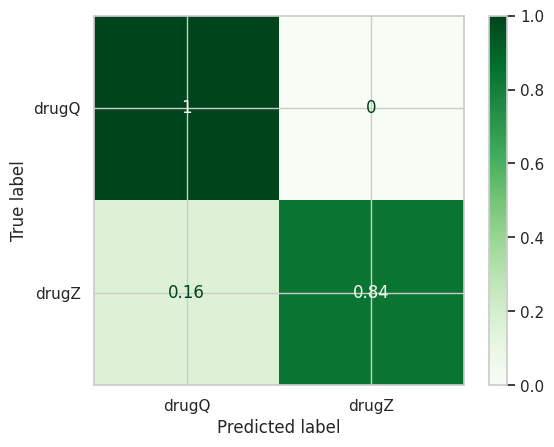

In [ ]:
print(classification_report(y_test, knn_best_model_test_pred))
ConfusionMatrixDisplay.from_predictions(y_test, knn_best_model_test_pred, normalize='true', cmap='Greens');

##Final model selection

What do 'false positives' and 'false negatives' mean for this problem? Which is worse?

- False Positives (FP):

  - Consequence: Recommending 'drugQ' when it's supposed to be 'drugZ.'
- False Negatives (FN):

  - Consequence: Recommending 'drugZ' when it's supposed to be 'drugQ.'

It's challenging to decide which error is more concerning, due to the unknown nature of 'drugQ' and 'drugZ,'

However based on the exploratory viz we can see that DrugZ is used for wider range of situation and cases.

So it's better to reduce false positives.







In this case **precision** is deemed the most important metric in this context,it highlight the performance of the model in minimizing this type of error .

In [ ]:
#models precisions
dc_tree_test_score = precision_score(y_test, dt_test_preds, pos_label='drugZ')
t_dc_tree_test_score = precision_score(y_test, dec_tree_best_model_test_pred,pos_label='drugZ')
log_reg_test_score = precision_score(y_test, logregp_test_preds,pos_label='drugZ')
t_log_reg_test_score= precision_score(y_test, logreg_best_model_test_pred,pos_label='drugZ')
knn_test_score = precision_score(y_test, knn_test_preds,pos_label='drugZ')
t_knn_test_score = precision_score(y_test, knn_best_model_test_pred,pos_label='drugZ')

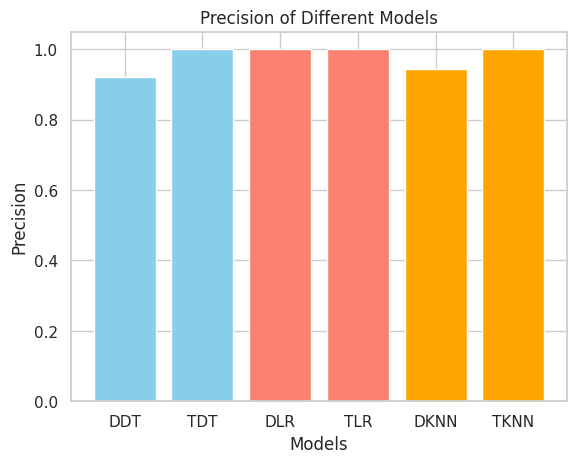

In [ ]:
# List of model names
models = ['DDT','TDT', 'DLR', 'TLR','DKNN', 'TKNN']

# Corresponding precisions
Precisions = [dc_tree_test_score, t_dc_tree_test_score, log_reg_test_score,t_log_reg_test_score,knn_test_score,t_knn_test_score]

# Create a bar plot
plt.bar(models, Precisions, color=['skyblue','skyblue', 'salmon', 'salmon','orange','orange'])
# Add labels and title
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision of Different Models')

# Show the plot
plt.show()

We have four models, all demonstrating perfect precision. In this case, the model with the highest accuracy on the test set among the four would be the preferred choice to recommend the best type of drug treatment for at-risk patients.

In [ ]:
#models accuracies
t_dc_tree_test_score = accuracy_score(y_test, dec_tree_best_model_test_pred)
log_reg_test_score = accuracy_score(y_test, logregp_test_preds)
t_log_reg_test_score= accuracy_score(y_test, logreg_best_model_test_pred)
t_knn_test_score = accuracy_score(y_test, knn_best_model_test_pred)


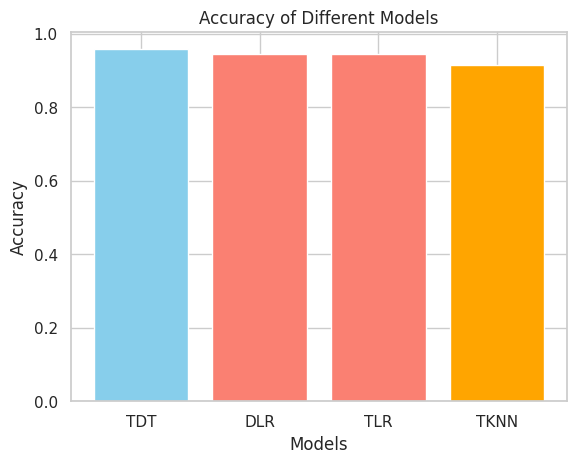

In [ ]:
# List of model names
models = ['TDT', 'DLR', 'TLR', 'TKNN']

# Corresponding accuracy scores
accuracies = [ t_dc_tree_test_score, log_reg_test_score,t_log_reg_test_score,t_knn_test_score]

# Create a bar plot
plt.bar(models, accuracies, color=['skyblue', 'salmon', 'salmon','orange'])
# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Show the plot
plt.show()


**Final Model : Tuned Decision Tree Classifier**

The Tuned Decision Tree Classifier stands out as the ideal choice for our problem. It excels in terms of accuracy(0.96), providing a robust and interpretable solution.
Additionally, the model achieves a  recall of 91.9% and a perfect precision of 100%, making it well-suited for our classification task.